<a href="https://colab.research.google.com/github/ogunjosam/ISIMIP_data/blob/main/ICRF/ICRF_boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary packages

In [57]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import calendar
import pandas as pd
import numpy as np

Get access to the data.  You might comment out this part if you are running on your local computer

In [20]:
!git clone -l -s 'https://github.com/ogunjosam/ISIMIP_data.git'


%cd ICRF
!dir

/content/ISIMIP_data/ICRF
pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_20110116-20141216_v20191108.nc
pr_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_20110116-20141216_v20200511.nc
pr_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_20110116-20141216_v20210113.nc
pr_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_20110116-20141216_v20190726.nc
readme


Read all the .nc files in the folder

In [56]:
ffl = glob.glob('*.nc')
kd = pd.DataFrame()
for i, ii in enumerate(ffl):
  dx = xr.open_dataset(ii).load()
  dy = dx.sel(lon=4.69,lat=7.95, method='nearest')
  kd[str.split(ii,'_')[2]] = dy['pr'].values

kd['Date'] = dx.indexes['time'].to_datetimeindex()
kd = kd.set_index('Date')


Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date')

Now, we have extracted all our point data into a dataframe.  Plotting as a boxplot should be very easy from here on

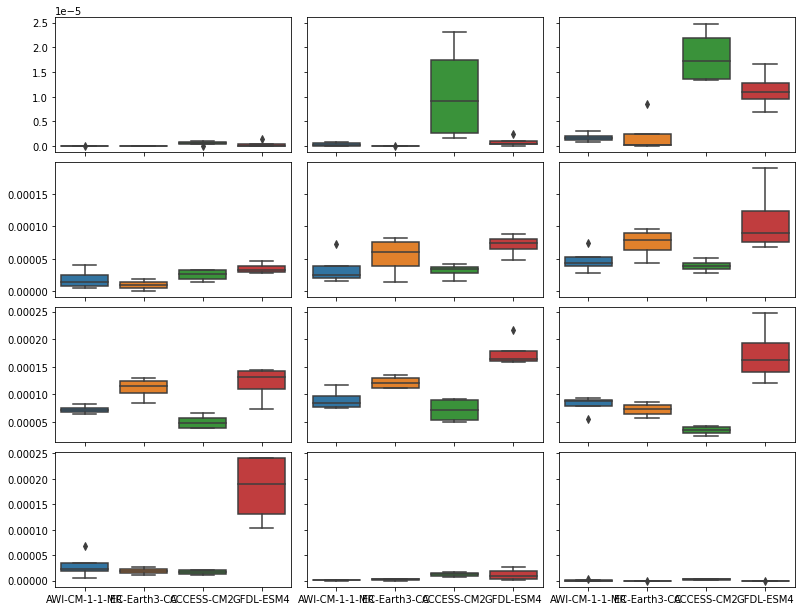

In [65]:
fig, axs = plt.subplots(nrows=4,ncols=3,figsize=(11,8.5),sharex='col',sharey='row')
fig.subplots_adjust(hspace=0.0,wspace=0.0)
plt.tight_layout(h_pad=0,w_pad=0)
axs=axs.flatten()

for i,ii in enumerate(np.arange(1,13)):
  fx = kd[kd.index.month == ii]
  sns.boxplot(data = fx, ax=axs[i])

